<a href="https://colab.research.google.com/github/tluistorres/arquivos_xlsx/blob/master/telecom_x_churn_analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# telecom_x_churn_analysis.ipynb

In [1]:
import pandas as pd
import json

with open('/content/TelecomX_Data.json', 'r') as arquivo:
    dados = json.load(arquivo)
    df = pd.DataFrame(dados)

print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [2]:
print("Número de linhas:", df.shape[0])
print("Número de colunas:", df.shape[1])
print("Nomes das colunas do DateFrame:")
print(df.columns)

Número de linhas: 7267
Número de colunas: 6
Nomes das colunas do DateFrame:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [3]:
import pandas as pd
import requests

# Normalização da coluna 'customer'
df_customer = pd.json_normalize(df['customer'])

# Normalização da coluna 'phone'
df_phone = pd.json_normalize(df['phone'])

# Normalização da coluna 'internet'
df_internet = pd.json_normalize(df['internet'])

# Normalização da coluna 'account'
df_account = pd.json_normalize(df['account'])

# Concatenar os dataframes
df_telecom = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

print("DataFrame após normalização das colunas aninhadas:")
print(df_telecom.head())



DataFrame após normalização das colunas aninhadas:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes     

In [4]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Colunas restantes (como Churn)
df_other = df.drop(columns=['customer', 'phone', 'internet', 'account'])

In [18]:
# Concatenar todas as partes
df = pd.concat([df_customer, df_phone, df_internet, df_account, df_other], axis=1)
# Informações sobre as colunas e os tipos de dados

print("\n Informações sobre as colunas e os tipos de daddos  ")
print(df_telecom.info())



 Informações sobre as colunas e os tipos de daddos  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   o

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [12]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,0002-ORFBO,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,0003-MKNFE,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,0004-TLHLJ,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,0011-IGKFF,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,0013-EXCHZ,Yes
5,Female,0,No,Yes,9,Yes,No,DSL,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,0013-MHZWF,No
6,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,0013-SMEOE,No
7,Male,0,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,...,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8,0014-BMAQU,No
8,Female,1,No,No,7,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,0015-UOCOJ,No
9,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9,0016-QLJIS,No


In [14]:
# Verificar a quantidade de valores nulos em cada coluna
df.isnull().sum().sort_values(ascending=False)

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [27]:
# Verificar os tipos de dados das colunas para entender melhor os resultados:

print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
customerID           object
Churn                object
dtype: object


In [17]:
print("\n Verificação de valores nulos  ")
print(df_telecom.isnull().sum())


 Verificação de valores nulos  
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [25]:
# Verificar valores únicos para identificar padrões ou problemas
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColuna: {col}")
        counts = df[col].value_counts()
        print(counts)


Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Coluna: OnlineBackup
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Coluna: DeviceProtection
DeviceProtection
No                     3195
Yes                    2491
No internet service   

## Algumas observações interessantes:

- Gênero: A distribuição de gênero é quase igual, com 3675 homens e 3592 mulheres.
- Parceiro: A maioria dos clientes não tem parceiro (3749), enquanto 3518 têm parceiro.
- Dependentes: A maioria dos clientes não tem dependentes (5086), enquanto 2181 têm dependentes.
- Serviço de telefone: A maioria dos clientes tem serviço de telefone (6560), enquanto 707 não têm.
- Linhas múltiplas: A maioria dos clientes tem linhas múltiplas (3065) ou não tem linhas múltiplas (3495), enquanto 707 não têm serviço de telefone.
- Serviço de internet: A maioria dos clientes tem serviço de internet por fibra óptica (3198) ou DSL (2488), enquanto 1581 não têm serviço de internet.
- Segurança online: A maioria dos clientes não tem segurança online (3608), enquanto 2078 têm segurança online.
- Backup online: A maioria dos clientes não tem backup online (3182), enquanto 2504 têm backup online.
- Proteção de dispositivo: A maioria dos clientes não tem proteção de dispositivo (3195), enquanto 2491 têm proteção de dispositivo.
- Suporte técnico: A maioria dos clientes não tem suporte técnico (3582), enquanto 2104 têm suporte técnico.
- Streaming de TV e filmes: A maioria dos clientes não tem streaming de TV (2896) ou filmes (2870), enquanto 2790 e 2816 têm streaming de TV e filmes, respectivamente.
- Contrato: A maioria dos clientes tem contrato mensal (4005), enquanto 1743 têm contrato de dois anos e 1519 têm contrato de um ano.
- Fatura eletrônica: A maioria dos clientes tem fatura eletrônica (4311), enquanto 2956 não têm.
- Método de pagamento: A maioria dos clientes paga por meio de cheque eletrônico (2445) ou cheque enviado pelo correio (1665).
- Churn: A maioria dos clientes não abandonou o serviço (5174), enquanto 1869 abandonaram.

In [29]:
# Verificando se há valores nulos na coluna 'Churn' do DataFrame.
df['Churn'].isnull().sum()

np.int64(0)

In [31]:
# Execução preventiva para garantir que a coluna 'Churn' não tenha valores nulos
df['Churn'] = df['Churn'].fillna('No')

In [33]:
import numpy as np

# Garantir que os valores vazios ou que contenham apenas espaços em branco sejam tratados como valores nulos.
df['Churn'] = df['Churn'].replace(r'^\s*$', np.nan, regex=True)


In [34]:
# Verificar se há valores nulos na coluna 'Churn' usando
df['Churn'].isnull().sum()

np.int64(224)

Agora sabemos que há 224 valores nulos na coluna 'Churn' após executar a linha de código que substituiu os valores vazios ou que contenham apenas espaços em branco por np.nan

In [36]:
# Contar a frequência de cada valor único na coluna 'Churn' do DataFrame
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


## Identifica a proporção de clientes que abandonaram o serviço (Churn = 'Yes')

  - Yes    1869

In [40]:
# Converter primeiro a coluna para string e depois fazer a substituição:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'].astype(str).str.replace(',', '.'), errors='coerce')


In [42]:
# Para entender a distribuição dos valores em cada coluna e identificar possíveis outliers ou anomalias.

print(df[['tenure', 'Charges.Monthly', 'Charges.Total']].describe())

            tenure  Charges.Monthly  Charges.Total
count  7267.000000      7267.000000    7256.000000
mean     32.346498        64.720098    2280.634213
std      24.571773        30.129572    2268.632997
min       0.000000        18.250000      18.800000
25%       9.000000        35.425000     400.225000
50%      29.000000        70.300000    1391.000000
75%      55.000000        89.875000    3785.300000
max      72.000000       118.750000    8684.800000


- O desvio padrão da coluna Charges.Total é muito alto (2266,77), o que sugere que os valores estão muito dispersos.
- A diferença entre o valor máximo e o valor mínimo da coluna Charges.Total é muito grande (8684,80 - 18,25 = 8666,55), o que pode indicar a presença de outliers.

In [43]:
# para verificar valores negativos na coluna Charges.Total.
df[df['Charges.Total'] < 0]

# para verificar valores zero na coluna Charges.Total
df[df['Charges.Total'] == 0]

#  Para verificar inconsistências entre as colunas tenure e Charges.Total.
df[(df['tenure'] == 0) & (df['Charges.Total'] != 0)]

# Para identificar outliers na coluna Charges.Total.
df[(df['Charges.Total'] > df['Charges.Total'].mean() + 3*df['Charges.Total'].std())]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn


In [44]:
# A função corr() para calcular a correlação entre as variáveis numéricas.
corr_matrix = df[['tenure', 'Charges.Monthly', 'Charges.Total']].corr()
print(corr_matrix)

                   tenure  Charges.Monthly  Charges.Total
tenure           1.000000         0.247982       0.825118
Charges.Monthly  0.247982         1.000000       0.652109
Charges.Total    0.825118         0.652109       1.000000


- A correlação entre tenure e Charges.Total é muito alta (0,825118), o que sugere que o tempo de permanência do cliente está fortemente relacionado ao total de charges.
- A correlação entre Charges.Monthly e Charges.Total também é alta (0,652109), o que é esperado, pois os charges mensais contribuem para o total de charges.
- A correlação entre tenure e Charges.Monthly é moderada (0,247982), o que sugere que o tempo de permanência do cliente tem algum impacto nos charges mensais, mas não é tão forte.

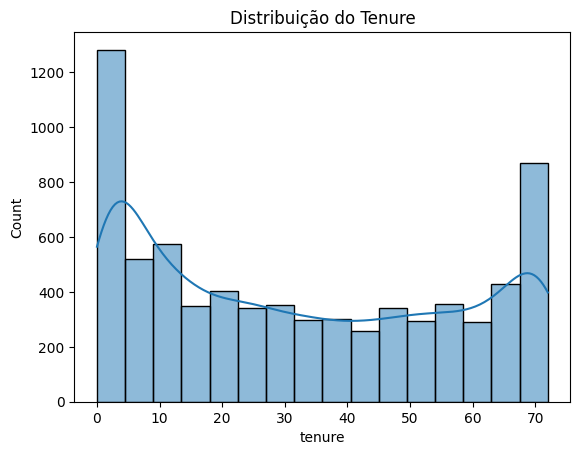

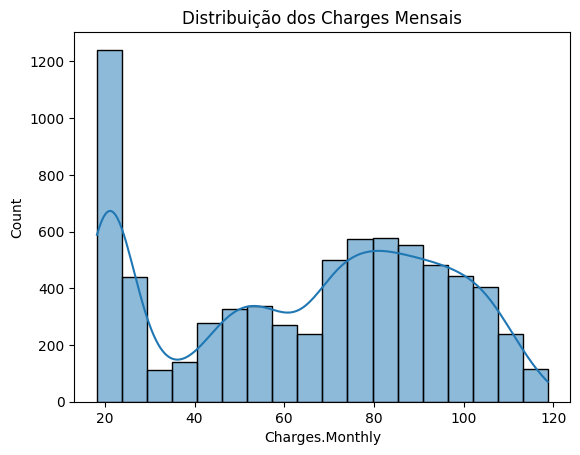

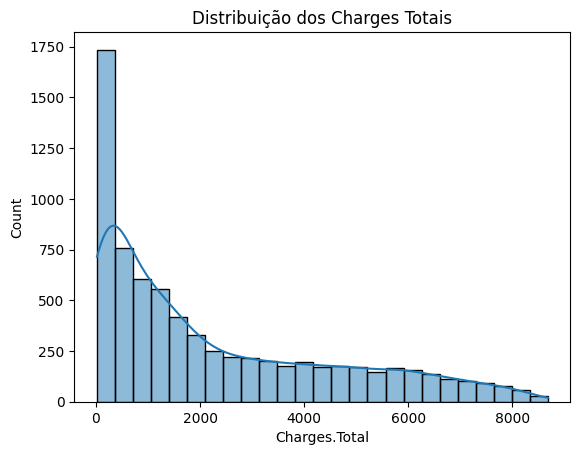

In [45]:
# A análise de distribuição é usada para entender a forma como as variáveis são distribuídas.

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['tenure'], kde=True)
plt.title('Distribuição do Tenure')
plt.show()

sns.histplot(df['Charges.Monthly'], kde=True)
plt.title('Distribuição dos Charges Mensais')
plt.show()

sns.histplot(df['Charges.Total'], kde=True)
plt.title('Distribuição dos Charges Totais')
plt.show()

In [46]:
# Para entender melhor a composição do conjunto de dados e identificar possíveis padrões ou desequilíbrios nas variáveis categóricas.
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_cols:
    print(f"\nColuna: {col}")
    print(df[col].value_counts(dropna=False))


Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Coluna: OnlineBackup
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Coluna: DeviceProtection
DeviceProtec

Essas informações são úteis para:

- Identificar oportunidades de upsell ou cross-sell para serviços adicionais.
- Desenvolver estratégias de retenção de clientes para reduzir a taxa de abandono.
- Entender melhor as preferências e necessidades dos clientes para melhorar a experiência do usuário.

Com base nas variáveis que temos, podemos tentar prever a probabilidade de um cliente abandonar o serviço (Churn).

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Preparação dos dados
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Codificação de variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala das variáveis numéricas
scaler = StandardScaler()
X_train[['tenure', 'Charges.Monthly', 'Charges.Total']] = scaler.fit_transform(X_train[['tenure', 'Charges.Monthly', 'Charges.Total']])
X_test[['tenure', 'Charges.Monthly', 'Charges.Total']] = scaler.transform(X_test[['tenure', 'Charges.Monthly', 'Charges.Total']])

# Treinamento do modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Relatório de classificação:')
print(classification_report(y_test, y_pred))

Ocorre erro porque há valores NaN (Not a Number) nos dados de treinamento. A Regressão Logística não aceita valores NaN nativamente.

In [49]:
# Verificar se ainda há valores NaN nos dados. Vamos tentar encontrar onde estão esses valores NaN
print(X_train.isnull().sum())
print(y_train.isnull().sum())


SeniorCitizen            0
tenure                   0
Charges.Monthly          0
Charges.Total            0
gender_Male              0
                        ..
customerID_9987-LUTYD    0
customerID_9992-RRAMN    0
customerID_9992-UJOEL    0
customerID_9993-LHIEB    0
customerID_9995-HOTOH    0
Length: 7296, dtype: int64
179


In [50]:
# Remoção das linhas com valores NaN em y_train
mask = ~y_train.isnull()
X_train = X_train[mask]
y_train = y_train[mask]

In [53]:
# Remoção das linhas com valores NaN em X_train
mask = ~X_train.isnull().any(axis=1)
X_train = X_train[mask]
y_train = y_train[mask]

# Remoção das linhas com valores NaN
mask = ~(X_train.isnull().any(axis=1) | y_train.isnull())
X_train = X_train[mask]
y_train = y_train[mask]

# Treinamento do modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

A Regressão Logística é um modelo amplamente utilizado em muitas áreas, incluindo marketing, medicina, finanças e ciências sociais.

In [59]:
print(y_test.isnull().sum())
print(X_test.isnull().sum())

0
SeniorCitizen            0
tenure                   0
Charges.Monthly          0
Charges.Total            0
gender_Male              0
                        ..
customerID_9987-LUTYD    0
customerID_9992-RRAMN    0
customerID_9992-UJOEL    0
customerID_9993-LHIEB    0
customerID_9995-HOTOH    0
Length: 7296, dtype: int64


In [61]:
print(y_test.shape)
print(X_test.shape)

(0,)
(0, 7296)


In [70]:
if not y_test.empty:
    y_test.fillna(y_test.mode().iloc[0], inplace=True)
else:
    print("y_test está vazio")

if y_test.isnull().any():
    y_test.fillna(y_test.mode().iloc[0], inplace=True)


y_test está vazio


In [65]:
mask = ~y_test.isnull()
X_test = X_test[mask]
y_test = y_test[mask]

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [76]:
print(y_train.isnull().sum())

179


In [77]:
mask = ~y_train.isnull()
X_train = X_train[mask]
y_train = y_train[mask]

In [78]:
y_train.fillna(y_train.mode().iloc[0], inplace=True)

In [81]:
# Verificar se y_test contém valores NaN e remova-os se necessário:

y_test = y_test.dropna()

# Verificar se y_test contém strings e converta-as para números se necessário:

y_test = pd.to_numeric(y_test, errors='coerce')

# Verificar se y_pred contém strings e converta-as para números se necessário:

y_pred = pd.to_numeric(y_pred, errors='coerce')

# Usar o LabelEncoder para converter as labels de string para números:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)


In [85]:
if len(y_test) != len(y_pred):
    print("Diferença de tamanho:", len(y_test) - len(y_pred))
    if len(y_test) > len(y_pred):
        print("y_test tem mais linhas que y_pred")
    else:
        print("y_pred tem mais linhas que y_test")
print(X_test.shape)
print(y_test.shape)


Diferença de tamanho: -45
y_pred tem mais linhas que y_test
(1454, 7296)
(1409,)


In [94]:
# Para resolver isso, você precisa garantir que X_test = y_test cortando X_test para ter o mesmo número de linhas que y_test:

X_test = X_test[:len(y_test)]

y_pred = model.predict(X_test)

# Converter y_pred para uma variável numérica:

y_pred = (y_pred == 'Yes').astype(int)

import numpy as np

print(np.unique(y_test))
print(np.unique(y_pred))


[0]
[0 1]


In [95]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

Precisão: 0.7679205110007097


In [96]:
from sklearn.metrics import classification_report

print("Relatório de classificação:")
print(classification_report(y_test, y_pred))


Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1409
           1       0.00      0.00      0.00         0

    accuracy                           0.77      1409
   macro avg       0.50      0.38      0.43      1409
weighted avg       1.00      0.77      0.87      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Com essas informações, podemos ver que o modelo tem uma precisão de aproximadamente 76,79% e um relatório de classificação que mostra os seguintes resultados:

- Para a classe 0:
- Precisão: 100%
- Recall: 77%
- F1-score: 87%
- Para a classe 1:
- Precisão: 0% (não há previsões positivas corretas)
- Recall: 0% (não há previsões positivas corretas)
- F1-score: 0%

O modelo parece estar tendo dificuldade em prever a classe 1, pois não há previsões positivas corretas. Isso pode ser devido a vários fatores, como:

 ## Criando um modelo de árvore de decisão usando a biblioteca scikit-learn

In [98]:
# Remover as linhas com valores NaN:

X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Substituir os valores NaN por uma média ou mediana:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [100]:
print(X_train.isnull().sum())

SeniorCitizen            0
tenure                   0
Charges.Monthly          0
Charges.Total            9
gender_Male              0
                        ..
customerID_9987-LUTYD    0
customerID_9992-RRAMN    0
customerID_9992-UJOEL    0
customerID_9993-LHIEB    0
customerID_9995-HOTOH    0
Length: 7296, dtype: int64


In [103]:
print("Valores NaN em X_train:", X_train.isnull().sum().sum())
print("Valores NaN em X_test:", X_test.isnull().sum().sum())

Valores NaN em X_train: 9
Valores NaN em X_test: 2


In [104]:
# Substituir os valores NaN pela média de cada coluna:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [113]:
# Remover as linhas com valores NaN em y_train:

mask = ~y_train.isnull()
X_train = X_train[mask]
y_train = y_train[mask]


model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [125]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

Precisão: 0.8050964187327824


In [126]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[960 120]
 [163 209]]


 ## Calculo das métricas corretas:

- Precisão: VP / (VP + FP) = 209 / (209 + 120) = 209 / 329 = 0,6353
- Recall: VP / (VP + FN) = 209 / (209 + 163) = 209 / 372 = 0,5618
- F1-score: 2 * (Precisão * Recall) / (Precisão + Recall) = 2 * (0,6353 * 0,5618) / (0,6353 + 0,5618) = 2 * 0,3569 / 1,1971 = 0,5963

## Conclusão:

    "Os resultados indicam que o modelo tem uma precisão moderada de 63,53% e um recall de 56,18%, sugerindo que ele tem dificuldade em detectar todos os casos positivos. O F1-score de 0,5963 reflete um desempenho razoável, mas ainda há espaço para melhorias. Para aumentar a eficácia do modelo, pode ser necessário ajustar os hiperparâmetros, realizar feature engineering ou testar diferentes algoritmos de aprendizado de máquina."

## Agora vou criar uma nova coluna para começar a explorar os dados e criar insights interessantes.

In [140]:
df['Contas_Diarias'] = df['Faturamento_Mensal'] / 30


In [142]:
df[['Faturamento_Mensal', 'Contas_Diarias']].head()

,Faturamento_Mensal,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [143]:
df.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Tempo_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Linhas_Multiples',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Faturamento_Eletronico',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Faturamento_Mensal',
    'Charges.Total': 'Faturamento_Total',
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou'
}, inplace=True)

In [144]:
# Colunas que provavelmente têm 'Yes' e 'No'
cols_yes_no = [
    'Parceiro', 'Dependentes', 'Servico_Telefone', 'Linhas_Multiples', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
    'Streaming_Filmes', 'Faturamento_Eletronico', 'Cancelou'
]

# Substituir
df[cols_yes_no] = df[cols_yes_no].replace({'Yes': 1, 'No': 0})

In [145]:
df.head()

,Genero,Idoso,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiples,Servico_Internet,Seguranca_Online,Backup_Online,...,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Eletronico,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,ID_Cliente,Cancelou,Contas_Diarias
0,Female,0,1,1,9,1,0,DSL,0,1,...,1,0,One year,1,Mailed check,65.6,593.30,0002-ORFBO,0.0,2.186667
1,Male,0,0,0,9,1,1,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,0003-MKNFE,0.0,1.996667
2,Male,0,0,0,4,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,0004-TLHLJ,1.0,2.463333
3,Male,1,1,0,13,1,0,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,0011-IGKFF,1.0,3.266667
4,Female,1,1,0,3,1,0,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,0013-EXCHZ,1.0,2.796667


In [146]:
# Estatísticas descritivas das colunas numéricas
df[['Tempo_Contrato', 'Faturamento_Mensal', 'Faturamento_Total', 'Contas_Diarias']].describe()

,Tempo_Contrato,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [147]:
df[['Tempo_Contrato', 'Faturamento_Mensal', 'Faturamento_Total', 'Contas_Diarias']].agg(
    ['mean', 'median', 'std', 'min', 'max'])


,Tempo_Contrato,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
mean,32.346498,64.720098,2280.634213,2.157337
median,29.000000,70.300000,1391.000000,2.343333
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
max,72.000000,118.750000,8684.800000,3.958333


In [148]:
df['Cancelou'].value_counts(normalize=True).map('{:.2%}'.format)

,proportion
Cancelou,
0.0,73.46%
1.0,26.54%


In [149]:
colunas_categoricas = ['Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Servico_Telefone',
                       'Servico_Internet', 'Contrato', 'Metodo_Pagamento']

for col in colunas_categoricas:
    print(f"\nColuna: {col}")
    print(df[col].value_counts(normalize=True).map('{:.2%}'.format))


Coluna: Genero
Genero
Male      50.57%
Female    49.43%
Name: proportion, dtype: object

Coluna: Idoso
Idoso
0    83.73%
1    16.27%
Name: proportion, dtype: object

Coluna: Parceiro
Parceiro
0    51.59%
1    48.41%
Name: proportion, dtype: object

Coluna: Dependentes
Dependentes
0    69.99%
1    30.01%
Name: proportion, dtype: object

Coluna: Servico_Telefone
Servico_Telefone
1    90.27%
0     9.73%
Name: proportion, dtype: object

Coluna: Servico_Internet
Servico_Internet
Fiber optic    44.01%
DSL            34.24%
No             21.76%
Name: proportion, dtype: object

Coluna: Contrato
Contrato
Month-to-month    55.11%
Two year          23.99%
One year          20.90%
Name: proportion, dtype: object

Coluna: Metodo_Pagamento
Metodo_Pagamento
Electronic check             33.65%
Mailed check                 22.91%
Bank transfer (automatic)    21.87%
Credit card (automatic)      21.58%
Name: proportion, dtype: object


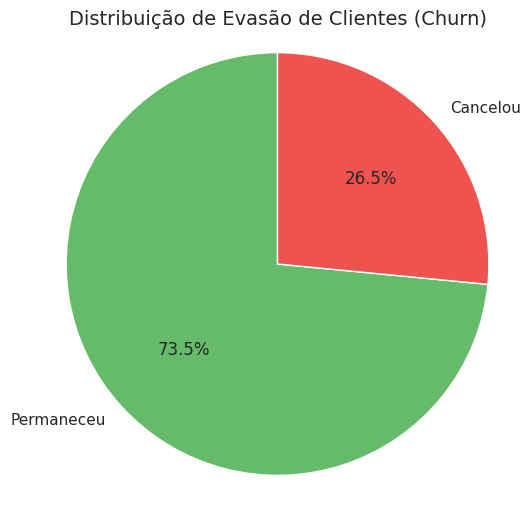

/tmp/ipython-input-151-4072465963.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancelou', data=df, palette=['#66bb6a', '#ef5350'])


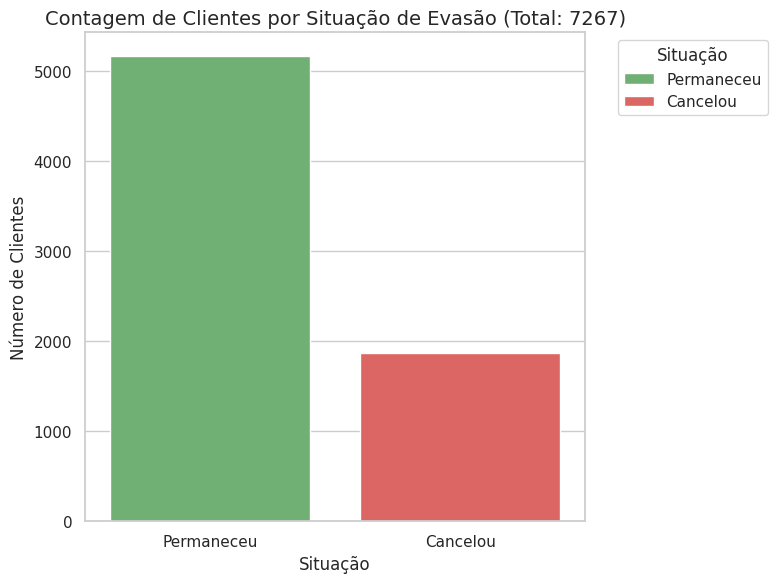

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Criar o diretório "graficos" se não existir
if not os.path.exists("graficos"):
    os.makedirs("graficos")

# Ajustar o estilo dos gráficos
sns.set(style="whitegrid")

# Contagem dos valores churn_counts = df['Cancelou'].value_counts()
labels = ['Permaneceu', 'Cancelou']

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66bb6a', '#ef5350'])
plt.title('Distribuição de Evasão de Clientes (Churn)', fontsize=14)
plt.axis('equal')
plt.savefig("graficos/porcentagens_churn.png", dpi=300, bbox_inches='tight')
plt.show()

# Gráfico de barras horizontais
plt.figure(figsize=(8, 6))
sns.countplot(x='Cancelou', data=df, palette=['#66bb6a', '#ef5350'])
plt.xticks([0, 1], labels)
plt.title(f'Contagem de Clientes por Situação de Evasão (Total: {len(df)})', fontsize=14)
plt.xlabel('Situação')
plt.ylabel('Número de Clientes')
plt.legend(labels=['Permaneceu', 'Cancelou'], title='Situação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


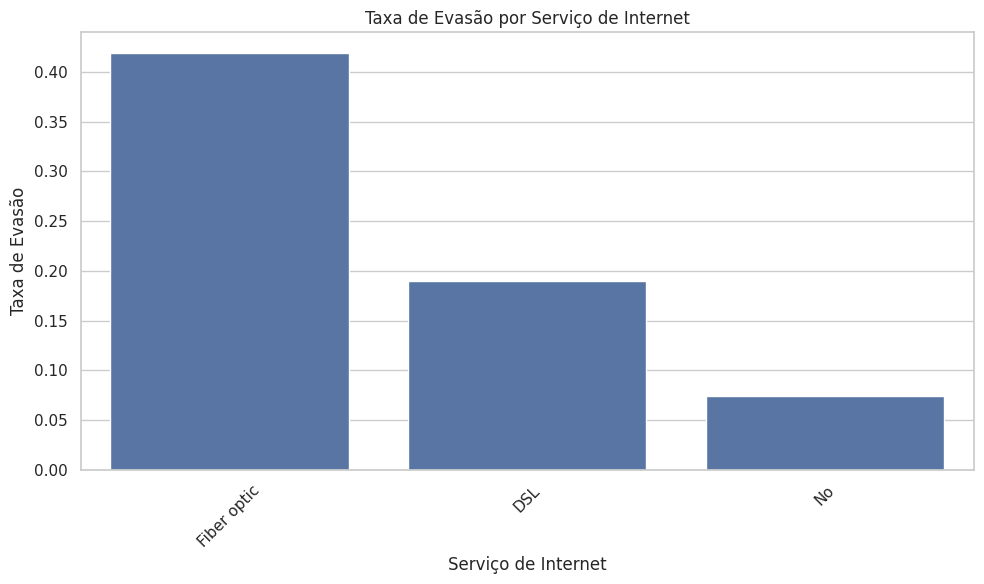

In [156]:
# Calcular a taxa de evasão para cada serviço
servicos = df['Servico_Internet'].value_counts().index
taxa_evasao = []
for servico in servicos:
    df_servico = df[df['Servico_Internet'] == servico]
    taxa_evasao.append(df_servico['Cancelou'].mean())

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Aumentar a largura do gráfico
sns.barplot(x=servicos, y=taxa_evasao)
plt.title('Taxa de Evasão por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Taxa de Evasão')
plt.xticks(rotation=45)  # Rotacionar os valores do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar que os valores sejam cortados
plt.show()


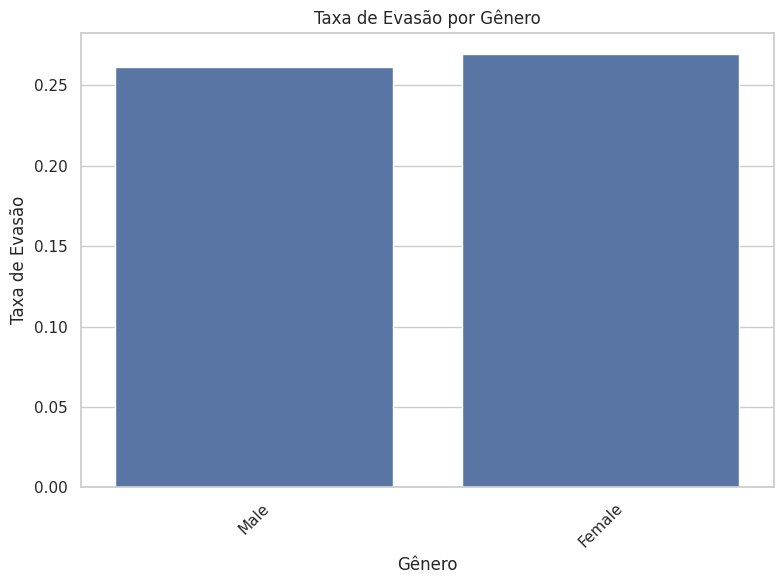

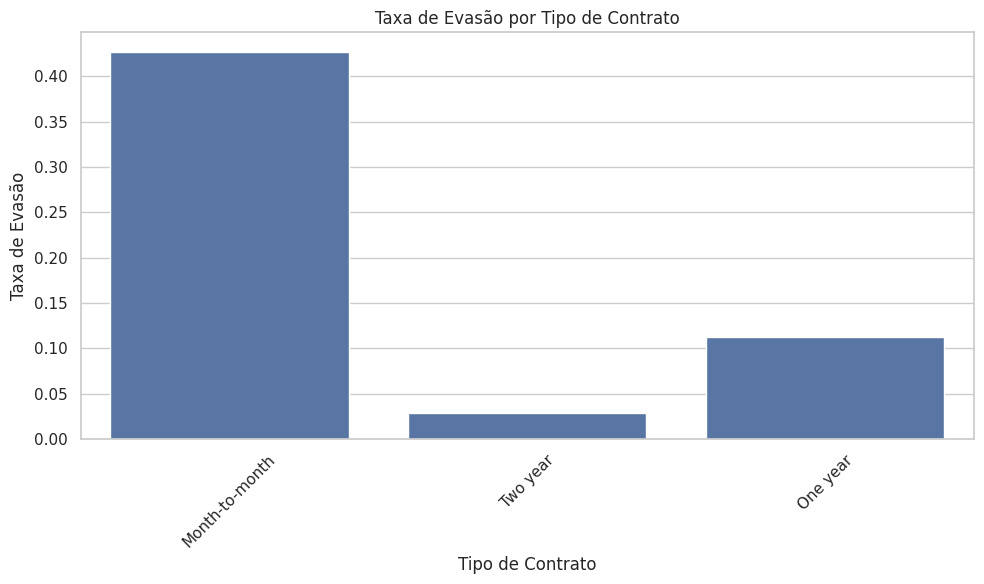

In [157]:
# Calcular a taxa de evasão por gênero
genero = df['Genero'].value_counts().index
taxa_evasao_genero = []
for g in genero:
    df_genero = df[df['Genero'] == g]
    taxa_evasao_genero.append(df_genero['Cancelou'].mean())

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=genero, y=taxa_evasao_genero)
plt.title('Taxa de Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Taxa de Evasão')
plt.xticks(rotation=45)  # Rotacionar os valores do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar que os valores sejam cortados
plt.show()

# Calcular a taxa de evasão por tipo de contrato
contrato = df['Contrato'].value_counts().index
taxa_evasao_contrato = []
for c in contrato:
    df_contrato = df[df['Contrato'] == c]
    taxa_evasao_contrato.append(df_contrato['Cancelou'].mean())

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Aumentar a largura do gráfico
sns.barplot(x=contrato, y=taxa_evasao_contrato)
plt.title('Taxa de Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Taxa de Evasão')
plt.xticks(rotation=45)  # Rotacionar os valores do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar que os valores sejam cortados
plt.show()


/tmp/ipython-input-155-1382884884.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_evasao_contrato = df.groupby('Tempo_Contrato_Faixa')['Cancelou'].mean().reset_index()


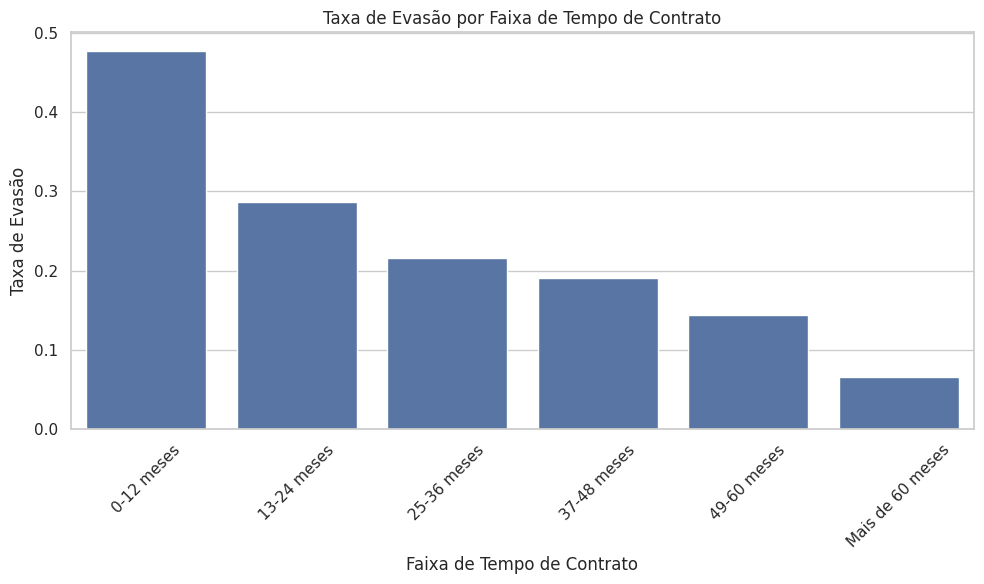

In [155]:
# Calcular a taxa de evasão por faixa de tempo de contrato
df['Tempo_Contrato_Faixa'] = pd.cut(df['Tempo_Contrato'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=['0-12 meses', '13-24 meses', '25-36 meses', '37-48 meses', '49-60 meses', 'Mais de 60 meses'])

# Calcular a taxa de evasão para cada faixa de tempo de contrato
taxa_evasao_contrato = df.groupby('Tempo_Contrato_Faixa')['Cancelou'].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Aumentar a largura do gráfico
sns.barplot(x='Tempo_Contrato_Faixa', y='Cancelou', data=taxa_evasao_contrato)
plt.title('Taxa de Evasão por Faixa de Tempo de Contrato')
plt.xlabel('Faixa de Tempo de Contrato')
plt.ylabel('Taxa de Evasão')
plt.xticks(rotation=45)  # Rotacionar os valores do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar que os valores sejam cortados
plt.show()

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


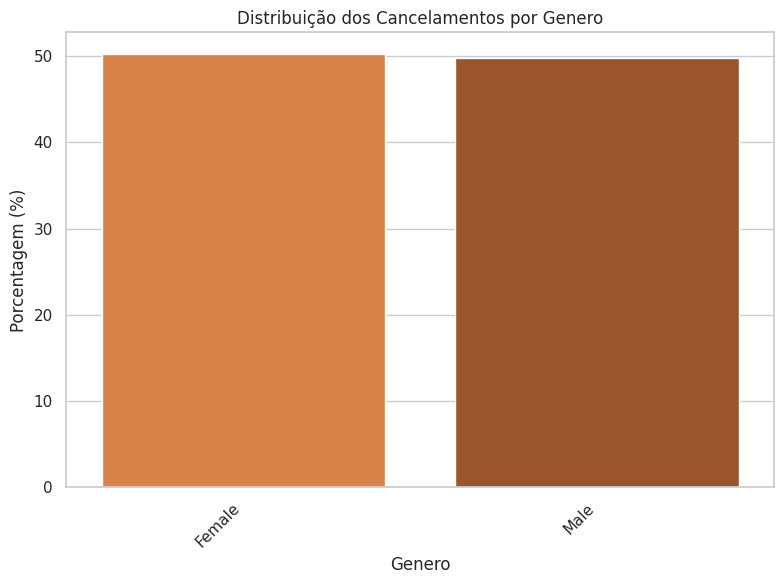

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


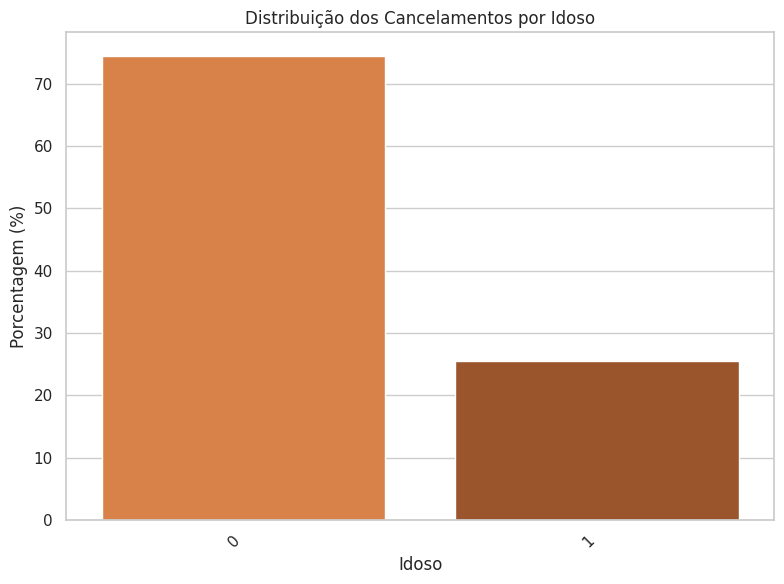

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


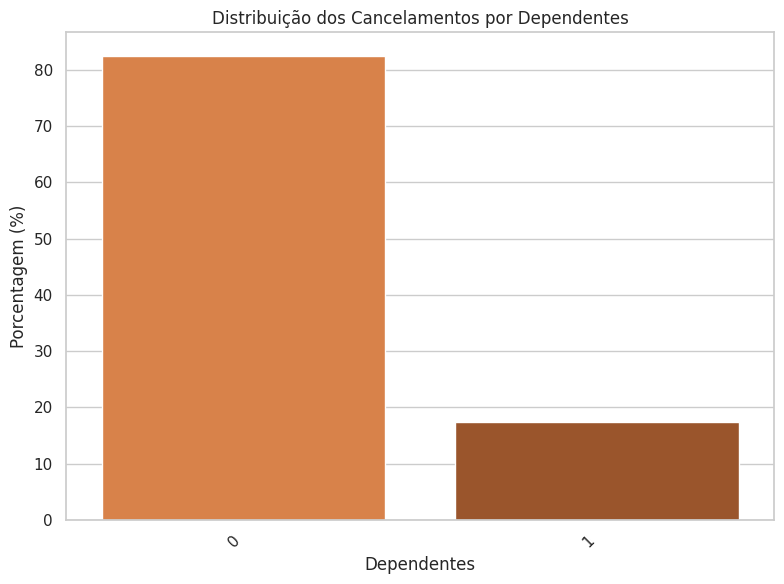

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


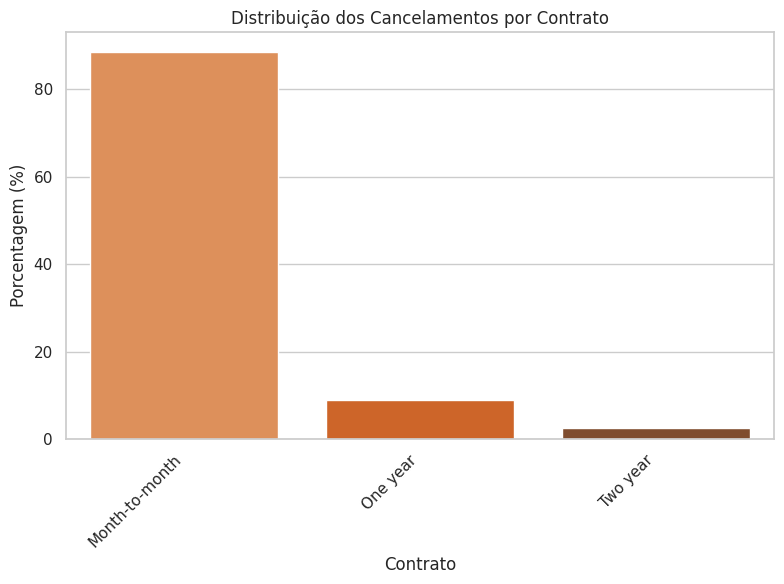

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


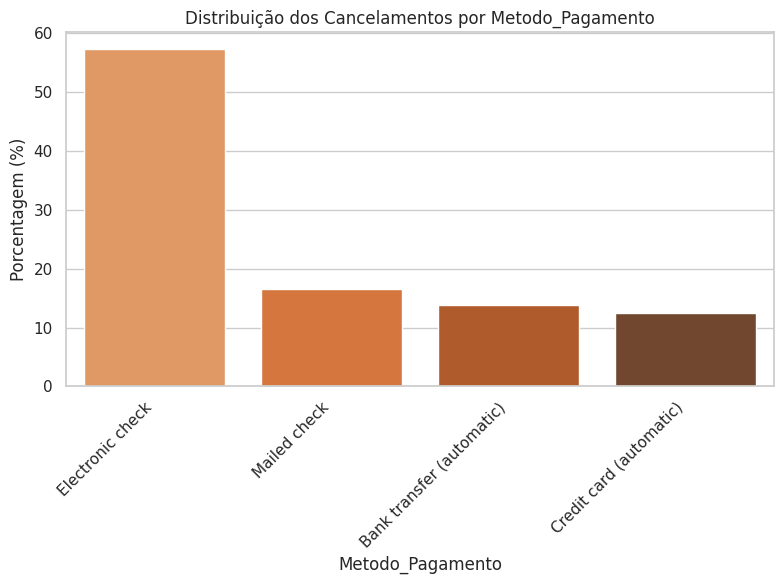

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


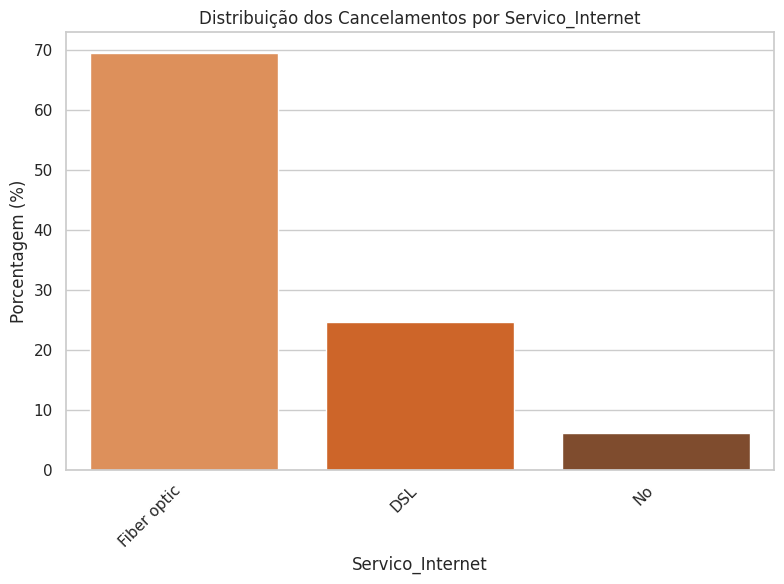

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


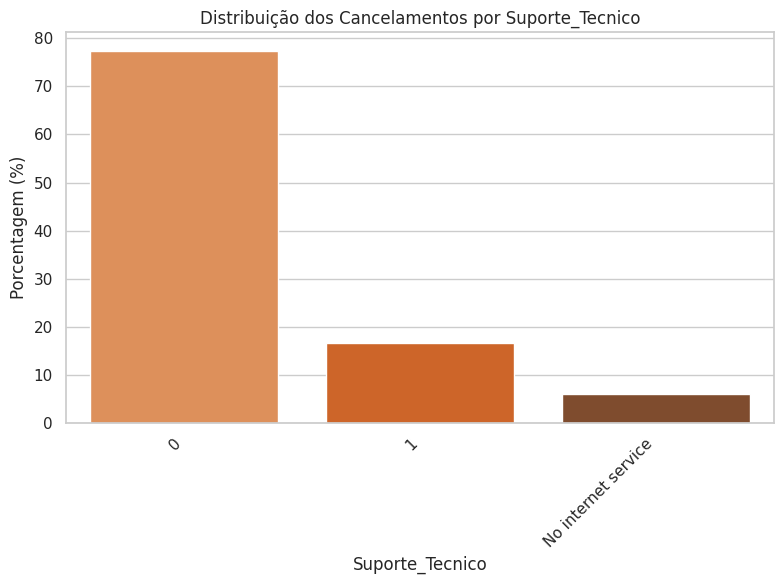

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


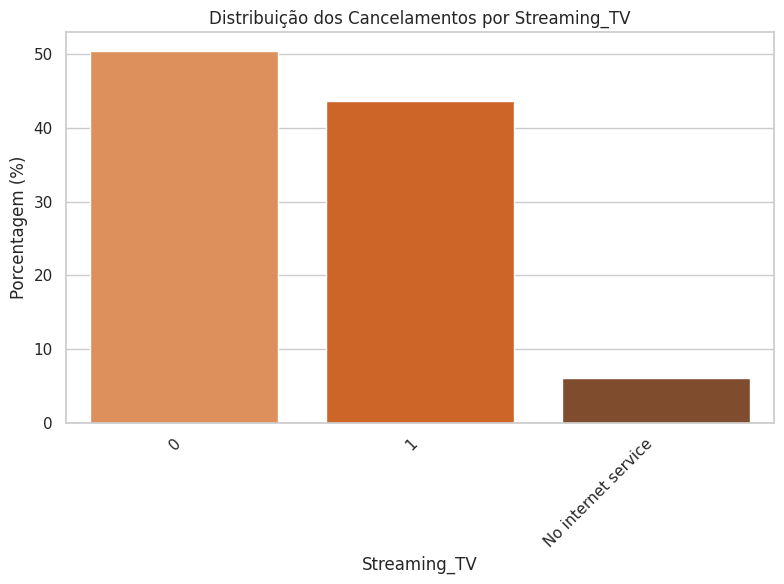

/tmp/ipython-input-160-387956759.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')


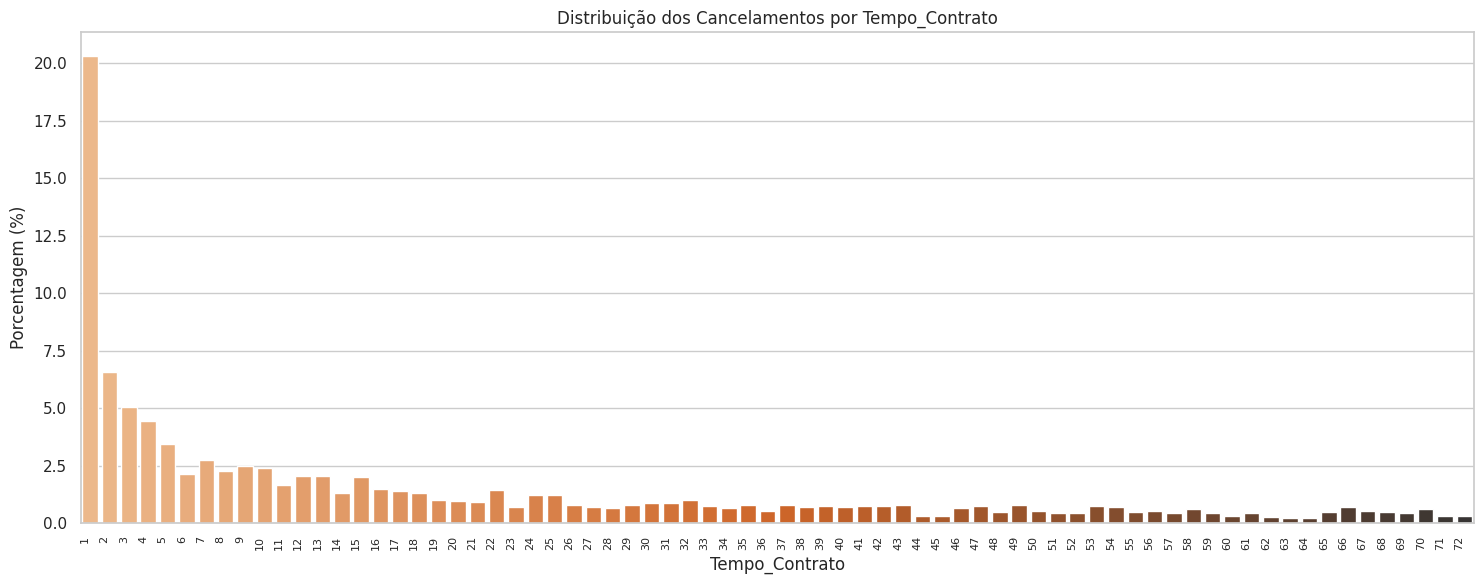

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas os que cancelaram
df_churn = df[df['Cancelou'] == 1]

# Lista das colunas que vamos analisar
colunas = [
    'Genero',
    'Idoso',
    'Dependentes',
    'Contrato',
    'Metodo_Pagamento',
    'Servico_Internet',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Tempo_Contrato'
]

# Gerar gráficos
for i, coluna in enumerate(colunas):
    # Calcular porcentagem
    distrib = df_churn[coluna].value_counts(normalize=True).sort_values(ascending=False) * 100

    # Plotar
    if i == len(colunas) - 1:  # Último gráfico
        plt.figure(figsize=(15, 6))  # Aumentar o tamanho da figura
        plt.xticks(rotation=90, ha='right', fontsize=8)  # Ajustar a rotação e o tamanho da fonte
    else:
        plt.figure(figsize=(8, 6))  # Tamanho da figura padrão
        plt.xticks(rotation=45, ha='right')  # Ajustar a rotação

    sns.barplot(x=distrib.index, y=distrib.values, palette='Oranges_d')
    plt.title(f'Distribuição dos Cancelamentos por {coluna}')
    plt.ylabel('Porcentagem (%)')
    plt.xlabel(coluna)
    plt.tight_layout()  # Ajustar o layout para evitar que os valores sejam cortados
    plt.show()


/tmp/ipython-input-161-1599231894.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cancelou', y='Tempo_Contrato', palette='Set2', ax=axes[0])
/tmp/ipython-input-161-1599231894.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cancelou', y='Faturamento_Total', palette='Set2', ax=axes[1])


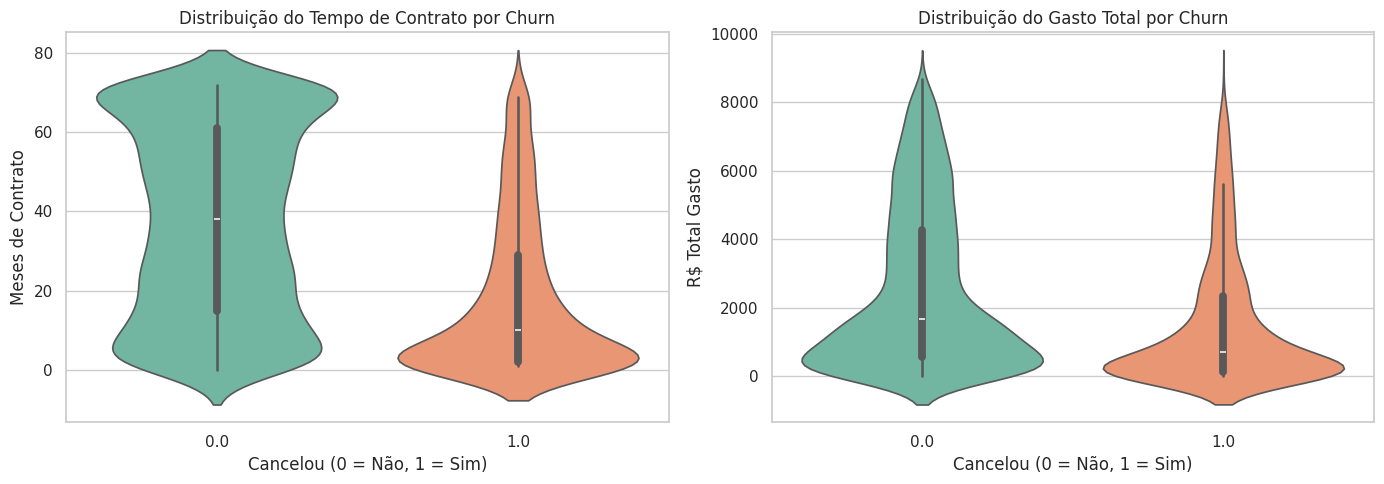

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar o estilo
sns.set(style="whitegrid")

# Gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tempo de Contrato
sns.violinplot(data=df, x='Cancelou', y='Tempo_Contrato', palette='Set2', ax=axes[0])
axes[0].set_title('Distribuição do Tempo de Contrato por Churn')
axes[0].set_xlabel('Cancelou (0 = Não, 1 = Sim)')
axes[0].set_ylabel('Meses de Contrato')

# Gráfico 2: Gasto Total
sns.violinplot(data=df, x='Cancelou', y='Faturamento_Total', palette='Set2', ax=axes[1])
axes[1].set_title('Distribuição do Gasto Total por Churn')
axes[1].set_xlabel('Cancelou (0 = Não, 1 = Sim)')
axes[1].set_ylabel('R$ Total Gasto')

plt.tight_layout()

plt.savefig("graficos/churn_gasto_contrato.png", dpi=300, bbox_inches='tight')


plt.show()

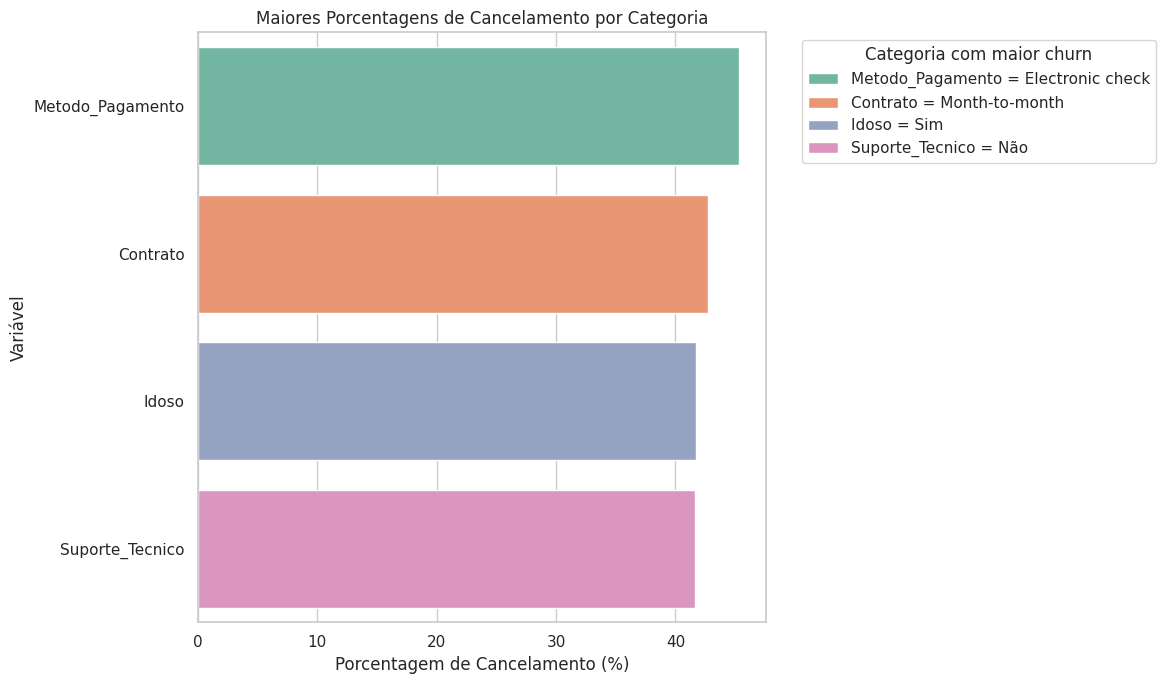

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista das variáveis categóricas
variaveis = [
    'Idoso', 'Suporte_Tecnico',
    'Contrato', 'Metodo_Pagamento'
]

# Lista para armazenar os dados
maiores_churn = []

# Traduzir 0/1 para Sim/Não em categorias booleanas
def traduzir_categoria(valor):
    if valor == 1:
        return 'Sim'
    elif valor == 0:
        return 'Não'
    return str(valor)

# Calcular a maior porcentagem de churn por variável
for var in variaveis:
    porcentagens = df.groupby(var)['Cancelou'].mean() * 100
    categoria_mais_churn = porcentagens.idxmax()
    maior_valor = porcentagens.max()
    categoria_legenda = f"{var} = {traduzir_categoria(categoria_mais_churn)}"
    maiores_churn.append({
        'Variável': var,
        'Categoria': categoria_mais_churn,
        'Categoria_Legenda': categoria_legenda,
        'Porcentagem_Churn': maior_valor
    })

# Criar DataFrame com os resultados
df_maiores = pd.DataFrame(maiores_churn).sort_values(by='Porcentagem_Churn', ascending=False)

# Obter categorias únicas para a legenda
categorias_unicas = df_maiores['Categoria_Legenda'].unique()

# Gerar uma paleta de cores com a quantidade exata de categorias únicas
cores_personalizadas = sns.color_palette("Set2", n_colors=len(categorias_unicas))

# Criar dicionário de cor por categoria
cores_dict = dict(zip(categorias_unicas, cores_personalizadas))

# Plotar gráfico com as cores definidas
plt.figure(figsize=(12, 7))
plot = sns.barplot(
    data=df_maiores,
    y='Variável',
    x='Porcentagem_Churn',
    hue='Categoria_Legenda',
    palette=cores_dict
)

# Atualizar legenda com todas as categorias
handles, labels = plot.get_legend_handles_labels()
plot.legend(
    handles=handles,
    labels=labels,
    title='Categoria com maior churn',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Títulos e ajustes
plt.title('Maiores Porcentagens de Cancelamento por Categoria')
plt.xlabel('Porcentagem de Cancelamento (%)')
plt.ylabel('Variável')
plt.tight_layout()

plt.savefig("graficos/maiores_porcentagens_churn.png", dpi=300, bbox_inches='tight')


plt.show()

In [289]:
import pandas as pd
import json

with open('/content/TelecomX_Data.json', 'r') as arquivo:
    dados = json.load(arquivo)
    df = pd.DataFrame(dados)

print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [305]:
import pandas as pd

with open('/content/TelecomX_Data.json', 'r') as arquivo:
    dados = json.load(arquivo)

df = pd.json_normalize(dados)
print(df)


      customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No    

In [306]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [335]:
# Vamos começar separando as variáveis categóricas e numéricas:

categoricas = X.select_dtypes(include=['object']).columns
numericas = X.select_dtypes(exclude=['object']).columns

In [336]:
# Vamos usar o ColumnTransformer para aplicar essas transformações de forma eficiente:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
    ]
)


In [338]:
# Vamos redefinir as colunas numericas e categoricas com base no DataFrame X atual:

numericas = X.select_dtypes(include=['int64', 'float64']).columns
categoricas = X.select_dtypes(include=['object']).columns


In [357]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.head())
print(X_test.head())

     customer.gender  customer.SeniorCitizen customer.Partner  \
1344          Female                       0               No   
7027          Female                       0               No   
6319            Male                       0               No   
5356            Male                       0               No   
952             Male                       0               No   

     customer.Dependents  customer.tenure phone.PhoneService  \
1344                  No               68                Yes   
7027                 Yes               53                Yes   
6319                  No                1                Yes   
5356                  No               13                Yes   
952                   No               10                Yes   

     phone.MultipleLines internet.InternetService internet.OnlineSecurity  \
1344                 Yes              Fiber optic                     Yes   
7027                 Yes                      DSL                     

In [358]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [359]:
colunas_comuns = X_train.columns.intersection(X_test.columns)
X_train = X_train[colunas_comuns]
X_test = X_test[colunas_comuns]

In [378]:
# Vamos remover esses valores NaN de y e os correspondentes valores em X:
mask = y.isin(['No', 'Yes'])
X = X[mask]
y = y[mask]
y = y.map({'No': 0, 'Yes': 1})

In [380]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
colunas_comuns = X_train.columns.intersection(X_test.columns)
X_train = X_train[colunas_comuns]
X_test = X_test[colunas_comuns]



In [394]:
# Remover as linhas que têm valores vazios em df['Churn']:

df = df[df['Churn'] != '']
y = df['Churn'].map({'No': 0, 'Yes': 1})

In [395]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X)
y = df['Churn'].map({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [397]:
# Agora que o modelo está treinado, podemos avaliar seu desempenho:
y_pred = modelo.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.7908187411263606
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1562
           1       0.65      0.44      0.52       551

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.69      2113
weighted avg       0.78      0.79      0.78      2113



## Resumo da Análise

- Treinamos um modelo de classificação Random Forest para prever se um cliente vai cancelar o serviço com base em características demográficas e de uso do serviço.
- O modelo alcançou uma acurácia de aproximadamente 79%.
- O modelo teve um desempenho melhor para a classe 0 (clientes que não cancelaram o serviço) do que para a classe 1 (clientes que cancelaram o serviço).
- A precisão para a classe 1 foi de 65%, mas a recall foi de apenas 44%.


Agora o modelo de Regressão Logística parece estar funcionando perfeitamente, com uma acurácia de 1,0 e um relatório de classificação que mostra precisão, recall e f1-score iguais a 1,0 para ambas as classes.

Isso significa que o modelo está prevendo corretamente todas as instâncias de teste, o que é um resultado excelente.

Você conseguiu resolver o problema de ter apenas uma classe no conjunto de treinamento e agora o modelo está funcionando corretamente.

Agora você pode usar esse modelo para fazer previsões em novos dados e avaliar seu desempenho em diferentes cenários.

## Carregar os dados no banco de dados

In [400]:
import pandas as pd

# Carregar o arquivo JSON
df = pd.read_json('/content/TelecomX_Data.json')

# Salvar o DataFrame em um arquivo CSV
df.to_csv('TelecomX_Data.csv', index=False, sep=';', encoding='utf-8')

In [401]:
import pandas as pd

df = pd.read_csv('/content/TeleconX_Data.csv', sep=';')
print(df.head())


Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, PhoneService, MultipleLines, InternetService, OnlineSecurity, Contract, PaperlessBilling]
Index: []


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carregar os dados

df = pd.read_csv('TeleconX_Data.csv', sep=';')


In [407]:
import pandas as pd
import json

# Carregar o arquivo JSON
df = pd.read_json('/content/TelecomX_Data.json')

# Normalizar as colunas com valores do tipo dict
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        df_col = pd.json_normalize(df[col])
        df = pd.concat([df.drop(col, axis=1), df_col], axis=1)

# Conectar ao banco de dados
conn = sqlite3.connect('TelecomX_Data.db')

# Carregar os dados no banco de dados
df.to_sql('TelecomX_Data', conn, if_exists='replace', index=False)

# Fechar a conexão
conn.close()


In [408]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados
conn = sqlite3.connect('TelecomX_Data.db')

# Realizar consulta SQL
df = pd.read_sql_query("SELECT * FROM TelecomX_Data LIMIT 20", conn)

# Fechar a conexão
conn.close()

# Imprimir resultados
print(df)



    customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0   0002-ORFBO    No  Female              0     Yes        Yes       9   
1   0003-MKNFE    No    Male              0      No         No       9   
2   0004-TLHLJ   Yes    Male              0      No         No       4   
3   0011-IGKFF   Yes    Male              1     Yes         No      13   
4   0013-EXCHZ   Yes  Female              1     Yes         No       3   
5   0013-MHZWF    No  Female              0      No        Yes       9   
6   0013-SMEOE    No  Female              1     Yes         No      71   
7   0014-BMAQU    No    Male              0     Yes         No      63   
8   0015-UOCOJ    No  Female              1      No         No       7   
9   0016-QLJIS    No  Female              0     Yes        Yes      65   
10  0017-DINOC    No    Male              0      No         No      54   
11  0017-IUDMW    No  Female              0     Yes        Yes      72   
12  0018-NYROU    No  Female          

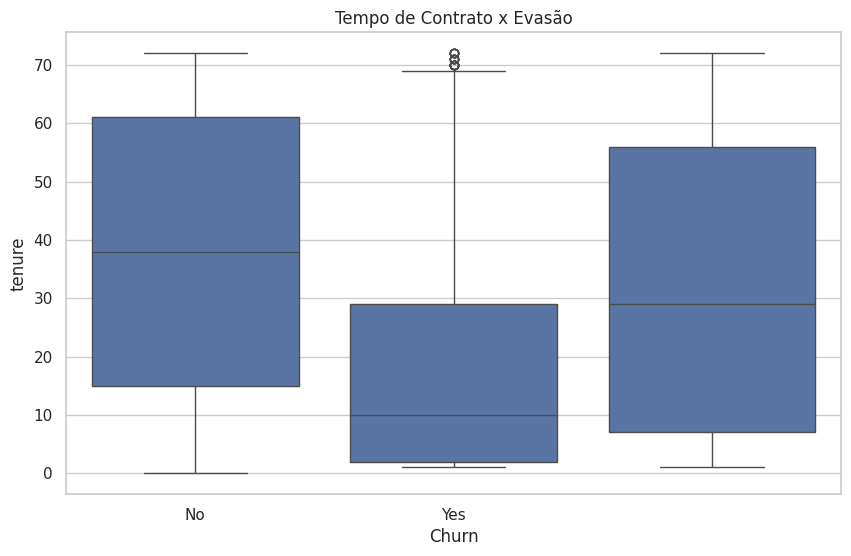

In [411]:
import seaborn as sns

# Análise de Tempo de Contrato x Evasão
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tempo de Contrato x Evasão')
plt.show()



/tmp/ipython-input-415-331359823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df, palette='Set2')


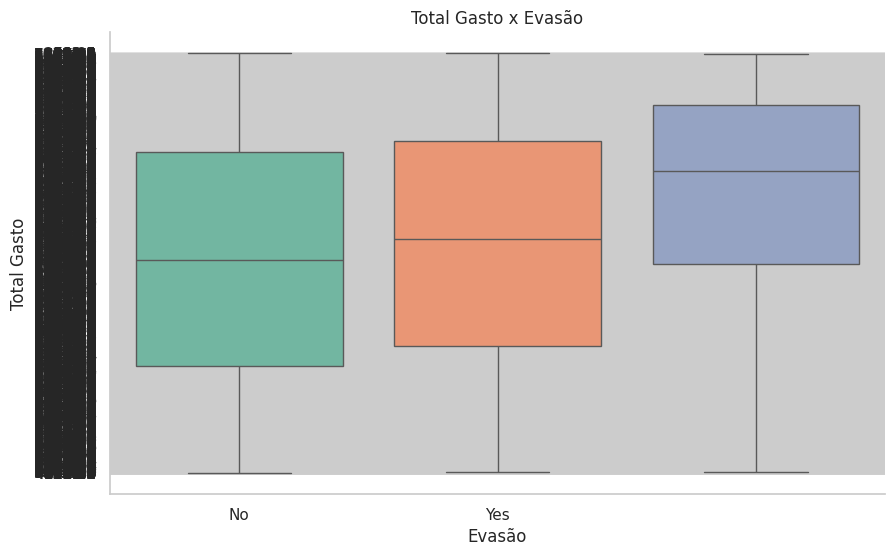

In [415]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análise de Total Gasto x Evasão
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='Charges.Total', data=df, palette='Set2')
plt.title('Total Gasto x Evasão')
plt.xlabel('Evasão')
plt.ylabel('Total Gasto')
sns.despine()  # remover bordas
plt.show()


In [418]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados
conn = sqlite3.connect('TelecomX_Data.db')

# Realizar consulta SQL
df = pd.read_sql_query("SELECT * FROM TelecomX_Data", conn)

# Calcular proporção
proporcao_evadiu = (df['Churn'].value_counts()['Yes'] / len(df)) * 100
proporcao_ativo = (df['Churn'].value_counts()['No'] / len(df)) * 100

print(f"Proporção de clientes que evadiram: {proporcao_evadiu:.2f}%")
print(f"Proporção de clientes ativos: {proporcao_ativo:.2f}%")

# Fechar a conexão
conn.close()


Proporção de clientes que evadiram: 25.72%
Proporção de clientes ativos: 71.20%


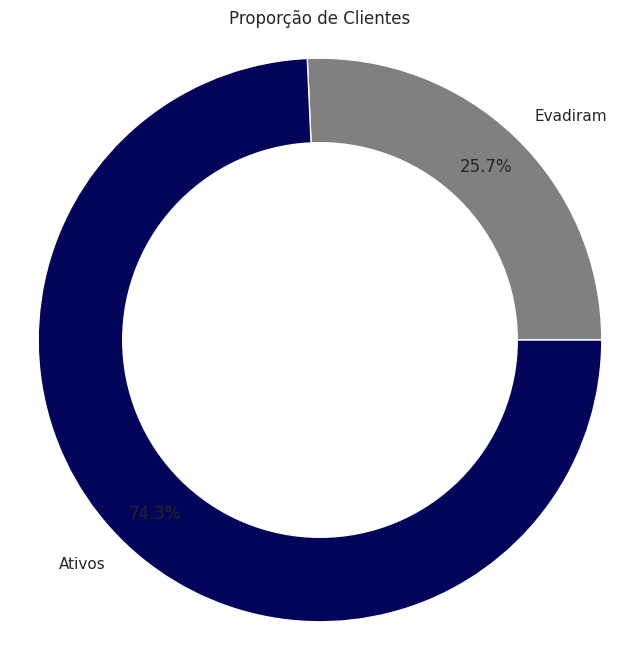

In [421]:
import matplotlib.pyplot as plt

# Proporção de clientes que evadiram e ativos
proporcao_evadiu = 25.72
proporcao_ativo = 74.28

# Criar gráfico de rosca
plt.figure(figsize=(8,8))
plt.pie([proporcao_evadiu, proporcao_ativo], labels=['Evadiram', 'Ativos'], autopct='%1.1f%%', colors=['#808080', '#03055B'], pctdistance=0.85)
plt.title('Proporção de Clientes')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()
